# Diamond Price Prediction

## Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\91798\Downloads\diamonds.csv")

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.describe(include="object")

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [7]:
# sns.pairplot(df)

In [8]:
df_num=df.describe().columns

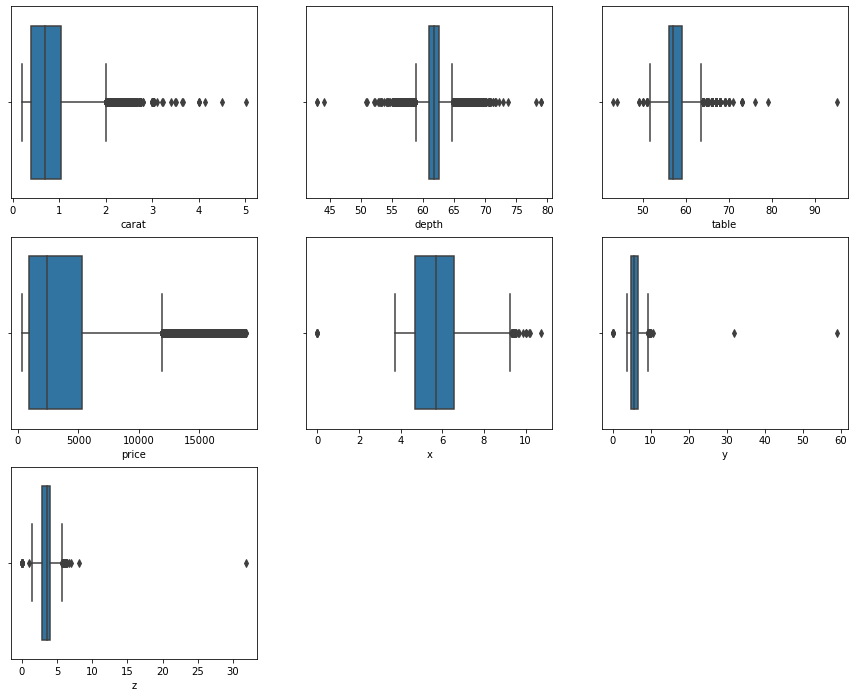

In [9]:
plt.figure(figsize=(15,12))

for i,j in enumerate(df_num):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[j])

<AxesSubplot:xlabel='price', ylabel='carat'>

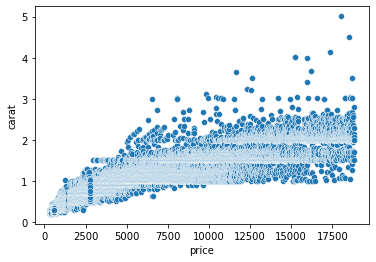

In [10]:
sns.scatterplot(x=df["price"],y=df["carat"])

In [11]:
def Out_rem(column):
    Q3=df[column].quantile(q=0.75)
    Q1=df[column].quantile(q=0.25)
    IQR=Q3-Q1
    max_lmt=Q3+1.5*(IQR)
    min_lmt=Q1-1.5*(IQR)
    out_idx=df[(df[column]>max_lmt) | (df[column]<min_lmt)].index
    print(df[column].name)
    print(Q3,"-",Q1,"=",IQR)
    print(max_lmt)
    print(min_lmt)
    print(out_idx)
    df.drop(labels=(out_idx),axis=0,inplace=True)
    sns.kdeplot(df[column])
    plt.show()
    sns.boxplot(df[column])
    plt.show()

carat
1.04 - 0.4 = 0.64
2.0
-0.5599999999999999
Int64Index([12246, 13002, 13118, 13757, 13991, 13992, 14138, 14912, 14913,
            15151,
            ...
            27734, 27736, 27737, 27738, 27739, 27741, 27742, 27744, 27746,
            27749],
           dtype='int64', length=1889)


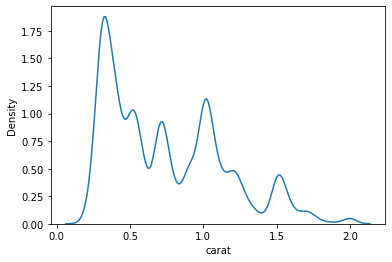

C:\Users\91798\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


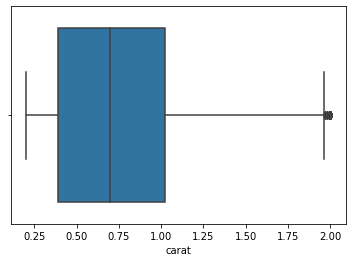

In [12]:
Out_rem("carat")

<AxesSubplot:xlabel='price', ylabel='carat'>

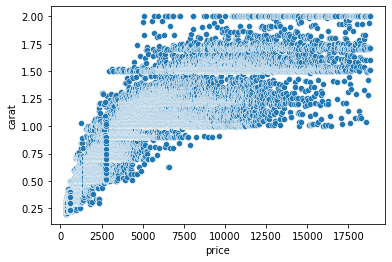

In [13]:
sns.scatterplot(x=df["price"],y=df["carat"])

<AxesSubplot:xlabel='price', ylabel='x'>

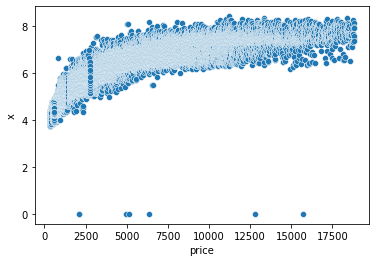

In [14]:
sns.scatterplot(x=df["price"],y=df["x"])

x
6.48 - 4.69 = 1.79
9.165000000000001
2.0050000000000003
Int64Index([11182, 11963, 15951, 24520, 26243, 49556, 49557], dtype='int64')


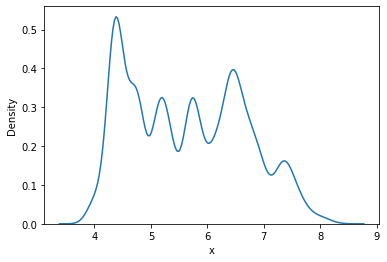

C:\Users\91798\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


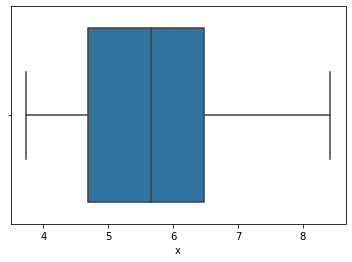

In [15]:
Out_rem("x")

<AxesSubplot:xlabel='price', ylabel='x'>

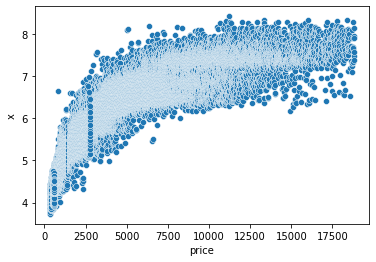

In [16]:
sns.scatterplot(x=df["price"],y=df["x"])

y
6.47 - 4.7 = 1.7699999999999996
9.125
2.045000000000001
Int64Index([24067, 49189], dtype='int64')


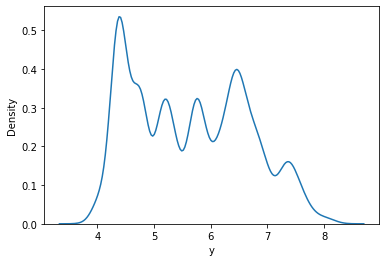

C:\Users\91798\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


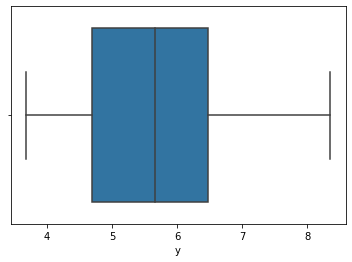

In [17]:
Out_rem("y")

<AxesSubplot:xlabel='price', ylabel='y'>

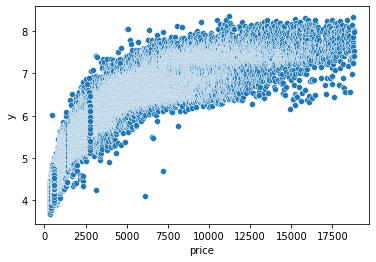

In [18]:
sns.scatterplot(x=df["price"],y=df["y"])

In [19]:
# df_num = df.select_dtypes(include=['int64', 'float64'])
# df_num

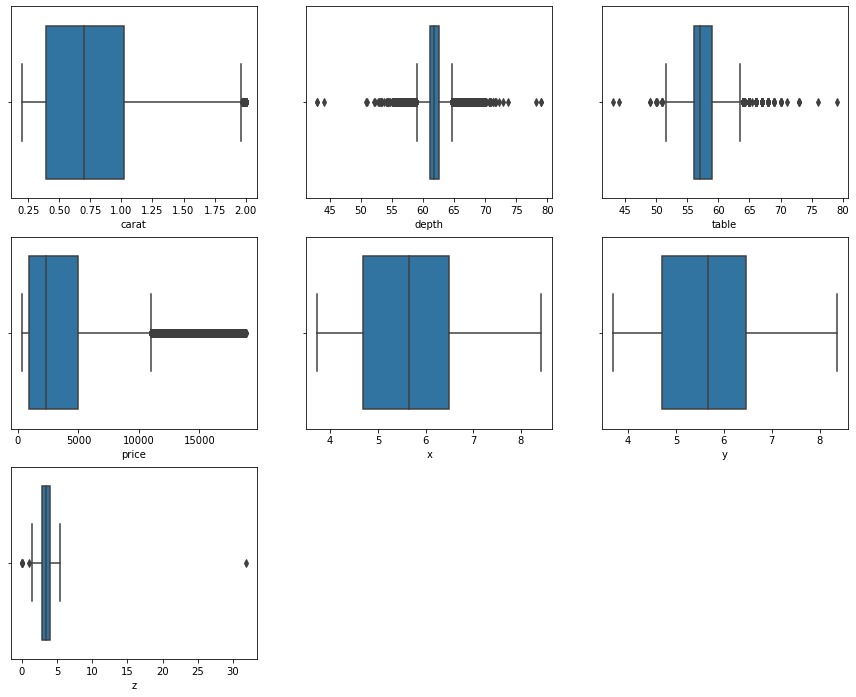

In [20]:
plt.figure(figsize=(15,12))

for i,j in enumerate(df_num):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[j])

In [21]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [22]:
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']]

df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


<AxesSubplot:>

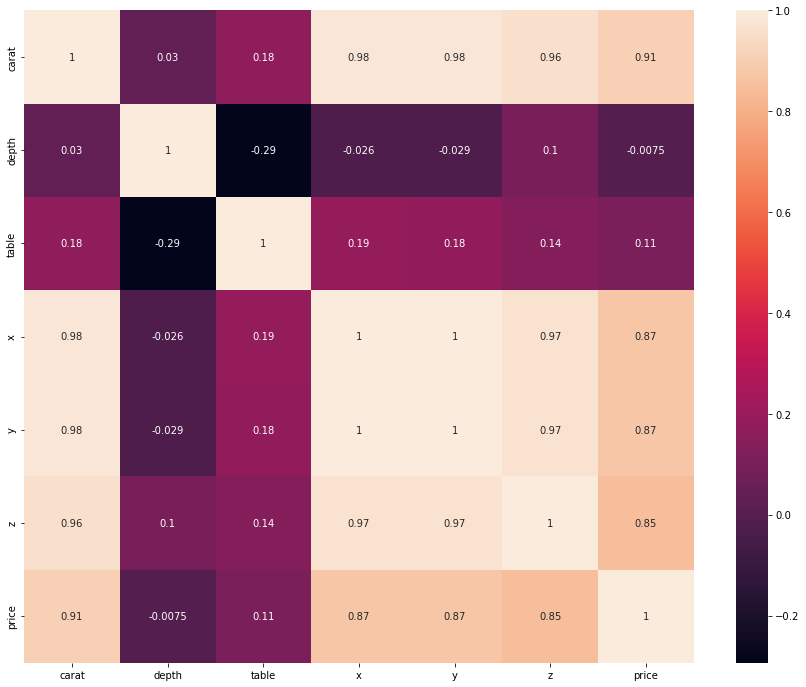

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [24]:
y = df['price']

X = df[['carat', 'clarity']]

## Identify the Target Variable and Splitting the Data into Train and Test

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [26]:
X_train.head()

,carat,clarity
48990,0.72,VS1
36612,0.32,SI1
30511,0.31,SI1
46974,0.23,VVS2
30904,0.31,VS2


In [27]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(39031, 2) (39031,)
(13011, 2) (13011,)


## Separating Categorical and Numerical Columns:

In [28]:
X_train.head()

,carat,clarity
48990,0.72,VS1
36612,0.32,SI1
30511,0.31,SI1
46974,0.23,VVS2
30904,0.31,VS2


In [29]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,clarity
48990,VS1
36612,SI1
30511,SI1
46974,VVS2
30904,VS2


In [30]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat
48990,0.72
36612,0.32
30511,0.31
46974,0.23
30904,0.31


## Applying Label Encoding on Categorical Columns

In [31]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
48990
36612
30511
46974
30904


In [32]:
X_train_cat.clarity.unique()

array(['VS1', 'SI1', 'VVS2', 'VS2', 'VVS1', 'SI2', 'IF', 'I1'],
      dtype=object)

In [33]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()

,clarity
48990,5
36612,3
30511,3
46974,6
30904,4


## Scaling the Numerical Features

In [34]:
X_train_num.head()

,carat
48990,0.72
36612,0.32
30511,0.31
46974,0.23
30904,0.31


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,carat
48990,-0.072318
36612,-1.066192
30511,-1.091039
46974,-1.289814
30904,-1.091039


## Concatinating the Encoded Categorical Features and Scaled Numerical Features

In [36]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,carat,clarity
48990,-0.072318,5
36612,-1.066192,3
30511,-1.091039,3
46974,-1.289814,6
30904,-1.091039,4


In [37]:
X_train_transformed.head()

,carat,clarity
48990,-0.072318,5
36612,-1.066192,3
30511,-1.091039,3
46974,-1.289814,6
30904,-1.091039,4


## Preparing Test Data

In [38]:
X_test.head()

,carat,clarity
45912,0.53,VS1
53197,0.70,VS2
42884,0.50,SI2
34340,0.30,VVS1
48373,0.57,VS2


In [39]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13011 entries, 45912 to 52098
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13011 non-null  float64
 1   clarity  13011 non-null  object 
dtypes: float64(1), object(1)
memory usage: 304.9+ KB


In [40]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,clarity
45912,VS1
53197,VS2
42884,SI2
34340,VVS1
48373,VS2


In [41]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat
45912,0.53
53197,0.70
42884,0.50
34340,0.30
48373,0.57


In [42]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat
45912,-0.544408
53197,-0.122011
42884,-0.618948
34340,-1.115886
48373,-0.445020


In [43]:
X_test_num.values[1].reshape(1,-1)

array([[0.7]])

In [44]:
scaler.transform(X_test_num.values[1].reshape(1,-1))

array([[-0.1220113]])

In [45]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
45912
53197
42884
34340
48373


In [46]:
X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,clarity
45912,5
53197,4
42884,2
34340,7
48373,4


In [47]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,carat,clarity
45912,-0.544408,5
53197,-0.122011,4
42884,-0.618948,2
34340,-1.115886,7
48373,-0.445020,4


In [48]:
# X_train_transformed=X_train_transformed[["carat"]]
# X_test_transformed=X_test_transformed[["carat"]]
# X_test_transformed

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [50]:
y_train_pred = regressor.predict(X_train_transformed)

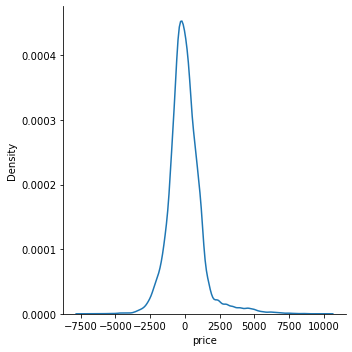

In [51]:
#Residual Analysis on Training Data

residual_lr = y_train - y_train_pred

sns.displot(residual_lr, kind='kde')

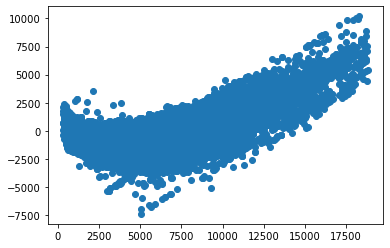

In [52]:
plt.scatter(y_train, residual_lr)

plt.show()

In [53]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2_score:",metrics.r2_score(y_train, y_train_pred))
r2 = metrics.r2_score(y_train, y_train_pred)
n = len(y_train)
k = X_test.shape[1]
r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
print("Adj_r2_score:",r2_adj)

Mean Absolute Error:  849.2291046566551
Mean Squared Error:  1527891.5844769946
Root Mean Squared Error:  1236.0791174018734
r2_score: 0.86892358340019
Adj_r2_score: 0.868916866355166


In [54]:
y_test_pred = regressor.predict(X_test_transformed)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("r2_score:",metrics.r2_score(y_test, y_test_pred))
r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test.shape[1]
r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
print("Adj_r2_score:",r2_adj)

Mean Absolute Error:  848.2225096003581
Mean Squared Error:  1565968.4745987006
Root Mean Squared Error:  1251.3866207526355
r2_score: 0.8657015598454489
Adj_r2_score: 0.8656809112537893


In [55]:
# Serialization

from pickle import dump

dump(regressor,open("pkl/model_lr.pkl","wb"))

dump(scaler,open("pkl/trans_scale.pkl","wb"))

In [56]:
# Deserialization

from pickle import load

regressor_lr = load(open('pkl/model_lr.pkl', 'rb'))

scaler = load(open('pkl/trans_scale.pkl', 'rb'))

In [57]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

clarity_encoder.keys()

dict_keys(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

In [76]:
num_scal=scaler.transform([[0.30]])

num_scal.flatten()

array([-1.11588555])

In [77]:
cat_encod=np.array([clarity_encoder["VVS2"]])

cat_encod

array([6])

In [78]:
np.concatenate((num_scal.flatten(),cat_encod ), axis=None).reshape(1,-1)

regressor_lr.predict(np.concatenate((num_scal.flatten(), cat_encod), axis=None).reshape(1,-1)).item()

723.2617045873935

In [79]:
df.price[34340]

862

<AxesSubplot:xlabel='price', ylabel='carat'>

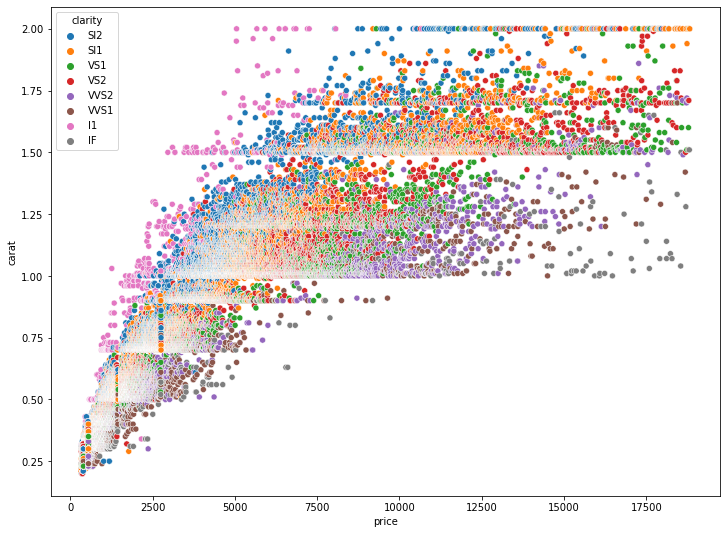

In [88]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=df["price"],y=df["carat"],hue=df["clarity"])


In [86]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [89]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

n_folds = 5

hyper_parameters = [{'max_depth': range(2, 20, 5)}]

rf = RandomForestRegressor()

# fit tree on training data
tunned_model_rf = RandomizedSearchCV(
                      estimator=rf, 
                      param_distributions=hyper_parameters,
                      cv=n_folds, 
                      scoring="r2",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train_transformed, y_train)

C:\Users\91798\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_depth': range(2, 20, 5)}],
                   return_train_score=True, scoring='r2', verbose=1)

In [90]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
best_estimator_rf=tunned_model_rf.best_estimator_
print()

print('Score on Test Data: ', tunned_model_rf.score(X_test_transformed, y_test))
r2_ws_RF=tunned_model_rf.score(X_test_transformed, y_test)

Best parameters set found on train set
{'max_depth': 7}
RandomForestRegressor(max_depth=7)

Score on Test Data:  0.9263725884996193


In [91]:
from sklearn.ensemble import RandomForestRegressor
tree = best_estimator_rf
tree.fit(X_train_transformed, y_train)

RandomForestRegressor(max_depth=7)

In [92]:
y_train_pred = tree.predict(X_train_transformed)

In [93]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))
print(metrics.r2_score(y_train, y_train_pred))

Mean Absolute Error:  498.29660774581384
0.9294373359070067


In [94]:
y_test_pred = tree.predict(X_test_transformed)

In [95]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print(metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  503.44484786545036
0.9263346467241963


In [96]:
# Serialization

from pickle import dump

dump(tree,open("pkl/model_rf.pkl","wb"))

# dump(scaler,open("pkl/trans_scale.pkl","wb"))